# Fature selection:

In this notebook we will be exploring different feature selction methods.
We will be using two datasets along this notebook:
1. The housing dataset of California.

2. The Titanic dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_housing = pd.read_csv("housing.csv")

In [3]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1. Filter methods

### 1.1 For Numerical variables:

In [4]:
# let's only keep the numerical variables 
cols = list(df_housing.columns)
cols.remove( 'ocean_proximity')

In [14]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [5]:
# Calculate the correlation between variables
df_housing_numerical = df_housing[cols]
df_housing_numerical.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


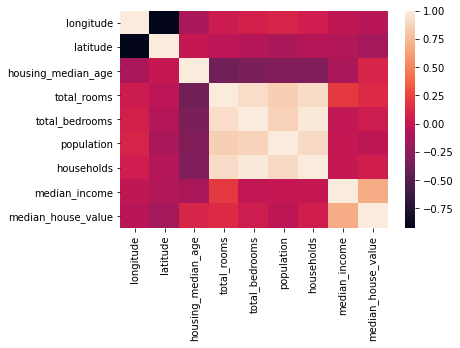

In [16]:
#visualise these correlations as a heatmap
sns.heatmap(df_housing_numerical.corr());

> We only now need to fix our target variable and then we chose only the valuable variables that can help in prediting this target. In other words, keeping only the variables that have strong correlation with our target. 

### 1.2 One of the variables is categorical and the other numerical:
 ANOVA test.
 In this context we are assuming that the target variable is categorical, so for our dataset this the 'ocean_proximity' variable. 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [7]:
#Specifying the dependant variable and the independant ones 
X = df_housing[cols]
y = df_housing['ocean_proximity']

In [16]:
#Splitting the data 
X = X.fillna(X.mean())

In [17]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from data
f = fs.fit(X, y)

In [18]:
f.scores_

array([1827.9884879 , 2572.84562964,  560.20235918,    5.44930669,
          2.99745439,   38.00245503,   11.57609269,  317.2904522 ,
       1612.14073588])

Feature 0: 1827.988488
Feature 1: 2572.845630
Feature 2: 560.202359
Feature 3: 5.449307
Feature 4: 2.997454
Feature 5: 38.002455
Feature 6: 11.576093
Feature 7: 317.290452
Feature 8: 1612.140736


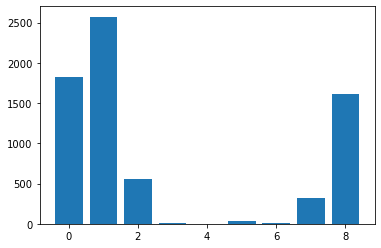

In [19]:
# what are scores for the features
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

> Some features score better which means they have a larger impact on the target variable like features 0 , 1 and 8.

### 1.3 Categorical Input, Categorical Output:
The Chi-square test. For this task we will be using another dataset it's the titanic dataset.


In [50]:
df_titanic = pd.read_csv("titanic.csv")


In [52]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [58]:
# Now in Chi-test we will be setting the target variable as the "Survived" variable 
cols2 = list(df_titanic.columns)
cols2.remove("Survived")
cols2.remove("Name")
X = df_titanic[cols2]
y = df_titanic["Survived"]

In [62]:
#Hot encode the Sex variable 
X = pd.get_dummies(X, columns=["Sex"])
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [67]:
#The dummy variables Sex_female and Sex_male are correlated so we only need a one 
X.drop("Sex_male",axis=1,inplace=True)

In [71]:
# Let's just change the label of the Sex_female into "Sex"
X.rename(columns={'Sex_female': 'Sex'},inplace=True)

In [72]:
X

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,0
883,1,19.0,0,0,30.0000,1
884,3,7.0,1,2,23.4500,1
885,1,26.0,0,0,30.0000,0


In [75]:
from sklearn.feature_selection import chi2
#Let's perform the test 
test = chi2(X,y)

In [88]:
# These are the Chi2 stats for each variable 
def print_chi2_results(results, alpha=0.05):
        for e in range(len(results)):
            if results[e] <= alpha  and results[e]> 0:
                print("we can not conclude that the feature {} is statistically associated with the target ".format(e))
            else:
                print("The feature {}  has a statistically significant association with the target".format(e))


In [89]:
print_chi2_results(test[0])

The feature 0  has a statistically significant association with the target
The feature 1  has a statistically significant association with the target
The feature 2  has a statistically significant association with the target
The feature 3  has a statistically significant association with the target
The feature 4  has a statistically significant association with the target
The feature 5  has a statistically significant association with the target
